In [1]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dataset/Titanic/tested.csv') # Loading dataset using Pandas Library into notebook file

In [3]:
df.head() # Displaying first Five Rows 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.shape # Checking Rows and Column of Data

(418, 12)

In [5]:
df.info() # Displaying Summary of Dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
df.describe() # getting the descriptive statistics of the DataFrame

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
df.duplicated().sum() # Checking for Duplicates

0

In [8]:
df.isna().sum() # Checking for Null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
df.nunique() # Checking for how many unique values are there

PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [10]:
from ydata_profiling import ProfileReport # package for data profiling, that automates and standardizes the generation of detailed reports, 
                                            #complete with statistics and visualizations.
import webbrowser   # To open in default webrowser to view it clearly and to avoid tokenization issue

In [11]:
profile = ProfileReport(df,explorative=True) 

In [12]:
webbrowser.open("titanic.html") 

True

# Explotary Data Analysis

In [13]:
df['Age'].isnull().sum()

86

In [14]:
df['Cabin'].isnull().sum()

327

## Heatmap 

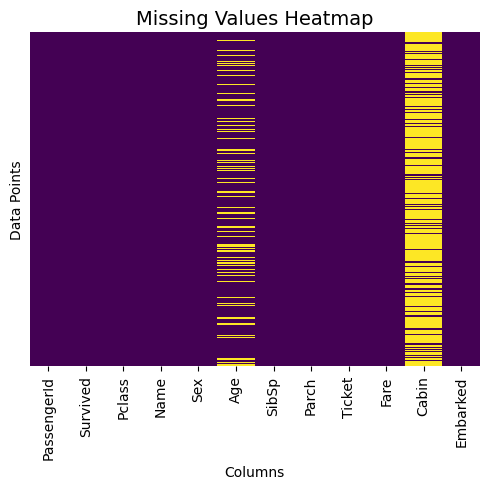

In [15]:
plt.figure(figsize=(5, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)

plt.title('Missing Values Heatmap', fontsize=14)
plt.xlabel('Columns')
plt.ylabel('Data Points')
plt.tight_layout()
plt.show()

- `Age` and `Cabin` contain missing values.
- `Cabin` has the most missing data (~77% missing).
- Missing `Age` values are manageable and require imputation.

## Distribution of Age (Historgram)

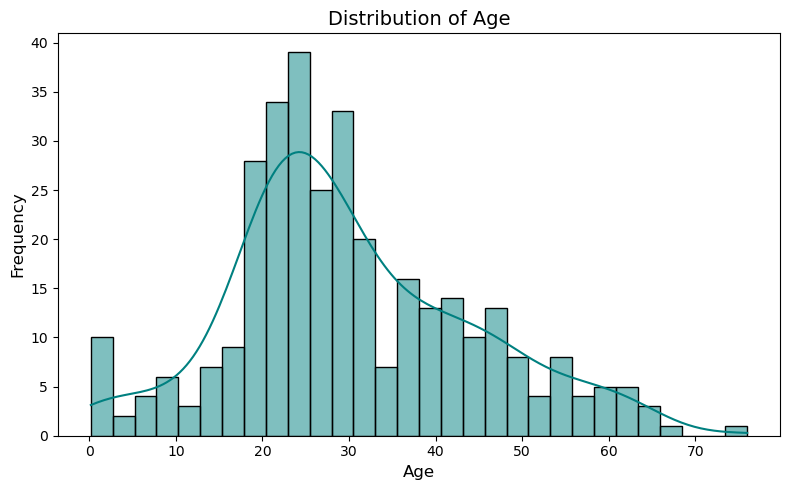

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=30, kde=True, color='teal')

plt.title('Distribution of Age', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

- Age distribution is right-skewed.
- Most passengers were between **20 to 30 years** old.
- Fewer children and elderly passengers.
- Important for survival analysis (young children priority).

## Distribution of Fare (Historgram)

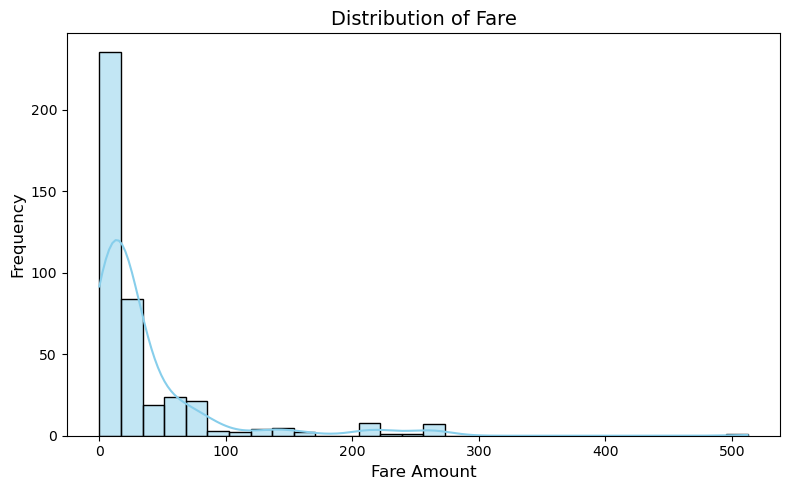

In [17]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Fare'], bins=30, kde=True, color='skyblue')

plt.title('Distribution of Fare', fontsize=14)
plt.xlabel('Fare Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

- Highly skewed distribution towards the lower fare range.
- Majority of passengers paid **low fares**.
- A few outliers paid very high fares (wealthy first-class passengers).
- Suggests need for log transformation for modeling

# Age Distribution by Survival Status Box Plot

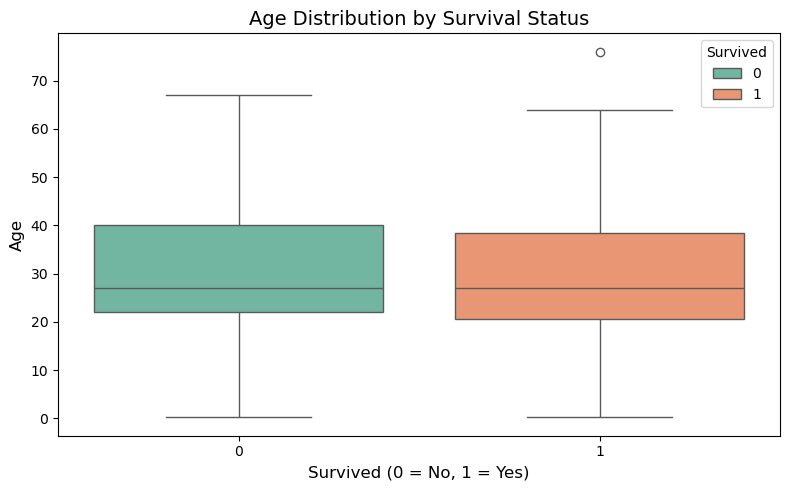

In [18]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Survived', y='Age',hue='Survived', data=df, palette='Set2')

plt.title('Age Distribution by Survival Status', fontsize=14)
plt.xlabel('Survived (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.tight_layout()
plt.show()

- Median age of survivors and non-survivors is quite similar.
- Slightly younger passengers seem to have higher survival chances.
- Both groups have a wide age range with visible outliers.
- Indicates age alone doesn't strongly determine survival.

In [19]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage[missing_percentage > 0].sort_values(ascending=False))

Cabin    78.229665
Age      20.574163
Fare      0.239234
dtype: float64


In [20]:
print(df.groupby(['Sex', 'Survived']).size())

Sex     Survived
female  1           152
male    0           266
dtype: int64


In [21]:
total_passengers = len(df)

# Number of passengers who died (Survived == 0)
died_passengers = df[df['Survived'] == 0].shape[0]

# Calculating death percentage
death_percentage = (died_passengers / total_passengers) * 100

print(f"Total Passengers: {total_passengers}")
print(f"Died Passengers: {died_passengers}")
print(f"Death Percentage: {death_percentage:.2f}%")


Total Passengers: 418
Died Passengers: 266
Death Percentage: 63.64%


## Count of Passengers by Sex

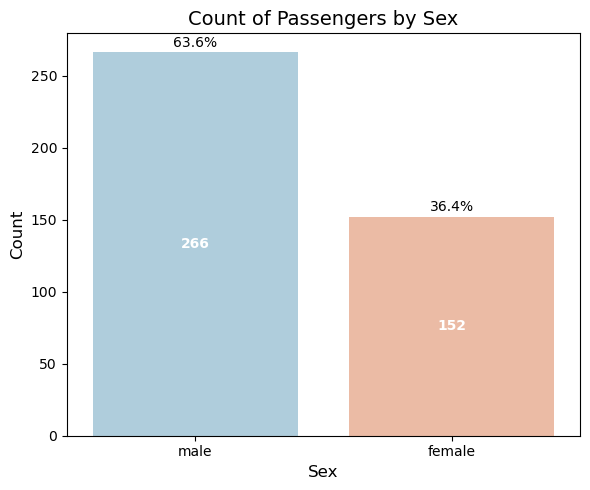

In [22]:
plt.figure(figsize=(6, 5))
ax = sns.countplot(data=df, x='Sex', hue='Sex', palette='RdBu_r')

plt.title('Count of Passengers by Sex', fontsize=14)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Count', fontsize=12)

total = len(df)

for p in ax.patches:
    count = int(p.get_height())
    percentage = 100 * count / total
    # Add count inside the bar
    ax.annotate(f'{count}', 
                (p.get_x() + p.get_width() / 2, count / 2), 
                ha='center', va='center', color='white', fontsize=10, fontweight='bold')
    # Add percentage outside the bar
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2, count + 2),  # adjust +2 for spacing
                ha='center', va='bottom', color='black', fontsize=10)

plt.tight_layout()
plt.show()

- Males were the majority onboard.
- Female count was significantly less than males.
- Important context for understanding survival bias.

# Survival by Gender

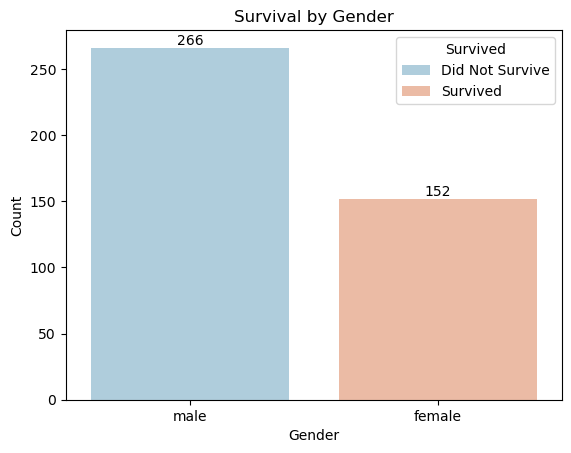

In [23]:
ax = sns.countplot(
    x='Sex', 
    hue='Survived', 
    data=df, 
    palette='RdBu_r'
)
for bar in ax.containers:
    ax.bar_label(bar, fontsize=10)
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Did Not Survive', 'Survived'])
plt.show()

- **Female survival rate is higher** (consistent with "Women and Children First").
- **Majority of males did not survive**.
- Gender was a significant factor influencing survival.

## Survival Count by Passenger Class

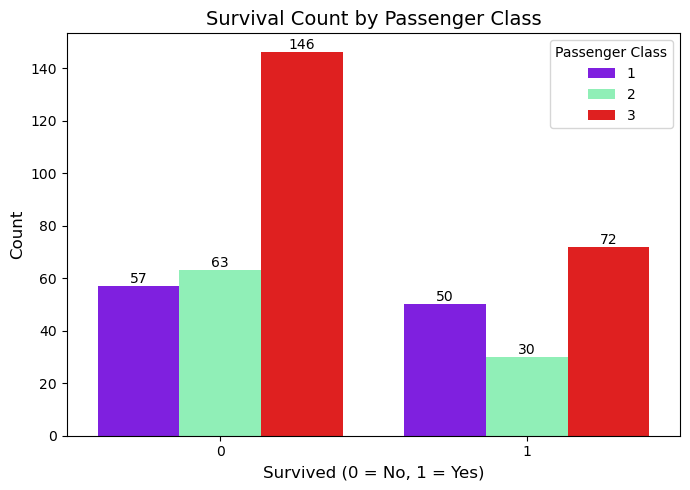

In [24]:
plt.figure(figsize=(7, 5))
ax = sns.countplot(x='Survived', hue='Pclass', data=df, palette='rainbow')

for bar in ax.containers:
    ax.bar_label(bar, fontsize=10)

plt.title('Survival Count by Passenger Class', fontsize=14)
plt.xlabel('Survived (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Passenger Class')
plt.tight_layout()
plt.show()

**Insights**

* **Passenger Class Impact:** The chart clearly demonstrates the significant impact of passenger class (Pclass) on survival rates. Passengers in Pclass 1 had a higher survival rate compared to Pclass 2 and Pclass 3.
* **Pclass 3 Disparity:** Pclass 3 had the highest number of passengers who did not survive (Survived = 0), indicating a much lower survival rate for this class.
* **Survival Rate by Class:**
    * Pclass 1: A larger proportion of Pclass 1 passengers survived (Survived = 1) compared to those who did not.
    * Pclass 2: The survival rate for Pclass 2 was better than Pclass 3 but not as high as Pclass 1.
    * Pclass 3: The survival rate was the lowest for Pclass 3.
* **Visual Confirmation:** The chart visually reinforces the well-known historical fact that lower-class passengers on the Titanic had a significantly reduced chance of survival.

## Feature Correlation Heatmap

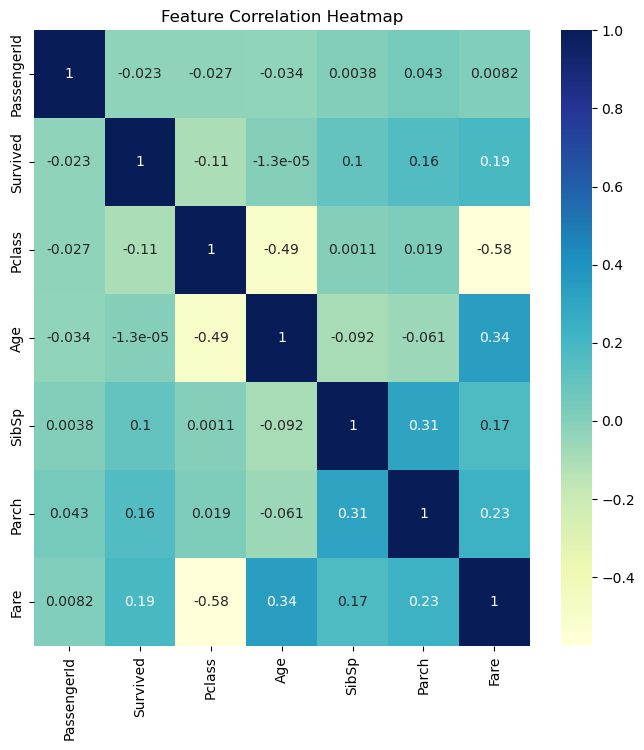

In [25]:
plt.figure(figsize=(8,8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='YlGnBu')
plt.title('Feature Correlation Heatmap')
plt.show()

Inferences from the Correlation Heatmap:
1. **PassengerId has minimal correlation with other features:**
   - The first row and column show very low correlation values, suggesting PassengerId is essentially random with respect to survival and other attributes.

2. **Passenger Class (Pclass) negatively impacts survival:**
   - There's a noticeable negative correlation (-0.11) between Pclass and Survived, implying that higher passenger classes (lower Pclass values) had a better survival rate.

3. **Fare positively correlates with survival:**
   - A positive correlation (0.19) exists between Fare and Survived, indicating that passengers who paid higher fares were more likely to survive.

4. **Pclass and Fare are strongly negatively correlated:**
   - The strong negative correlation (-0.58) between Pclass and Fare suggests that passengers in lower classes (higher Pclass values) paid lower fares.

5. **Age and Pclass show moderate negative correlation:**
   - The moderate negative correlation (-0.49) between Age and Pclass indicates that older passengers tended to be in higher passenger classes.

## Survival Count by Embarked Location

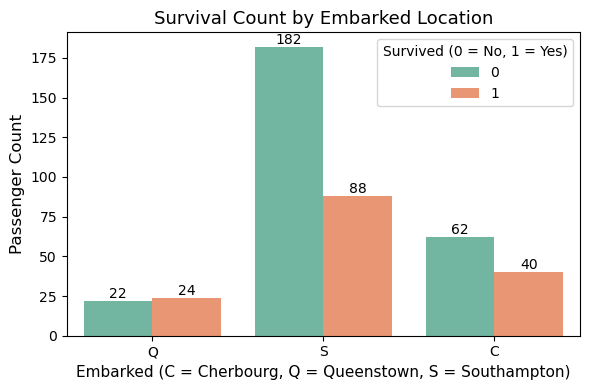

In [26]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='Embarked', hue='Survived', palette='Set2')

for bar in ax.containers:
    ax.bar_label(bar, fontsize=10)

plt.title('Survival Count by Embarked Location', fontsize=13)
plt.xlabel('Embarked (C = Cherbourg, Q = Queenstown, S = Southampton)', fontsize=11)
plt.ylabel('Passenger Count', fontsize=12)
plt.legend(title='Survived (0 = No, 1 = Yes)', loc='upper right')

plt.tight_layout()
plt.show()

- Southampton (S) had the highest number of passengers and also the highest number of both survivors and non-survivors.
- Cherbourg (C) had a higher survival rate compared to Queenstown (Q) and Southampton (S), despite having a lower overall passenger count.
- Queenstown (Q) had the lowest overall passenger count and the lowest number of survivors.

## Passenger Class Distribution by Embarked Point

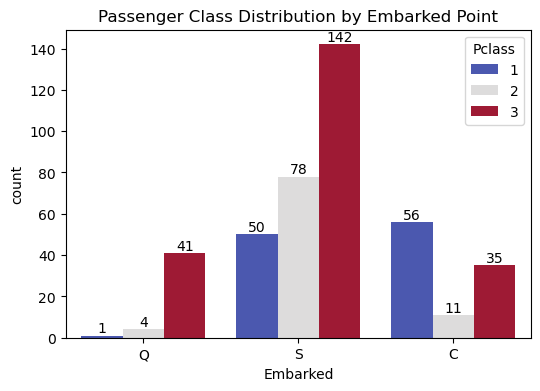

In [27]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='Embarked', hue='Pclass', palette='coolwarm')

for bar in ax.containers:
    ax.bar_label(bar, fontsize=10)
    
plt.title('Passenger Class Distribution by Embarked Point')
plt.show()

- Southampton (S) had the highest number of passengers overall, with a significant majority being in the 3rd class (Pclass 3).
- Cherbourg (C) had a higher proportion of 1st class (Pclass 1) passengers compared to the other embarkation points.
- Queenstown (Q) had a low number of passengers across all classes, with a slight dominance in the 3rd class.

##  Average Fare by Embarked Location

C:\Users\pc\AppData\Local\Temp\ipykernel_8080\1251502079.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x='Embarked', y='Fare', estimator=np.mean, palette='Set3')


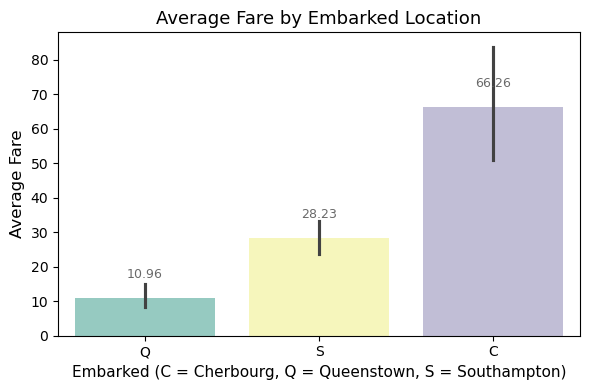

In [28]:
plt.figure(figsize=(6, 4))
ax = sns.barplot(data=df, x='Embarked', y='Fare', estimator=np.mean, palette='Set3')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2, p.get_height() + 5),
                ha='center', va='bottom', fontsize=9, color='dimgray')

plt.title('Average Fare by Embarked Location', fontsize=13)
plt.xlabel('Embarked (C = Cherbourg, Q = Queenstown, S = Southampton)', fontsize=11)
plt.ylabel('Average Fare', fontsize=12)
plt.tight_layout()
plt.show()

- Cherbourg (C) had the highest average fare by a significant margin compared to the other embarkation points.
- Queenstown (Q) had the lowest average fare, indicating potentially lower-class passengers or shorter travel distances.
- Southampton (S) had an average fare between the other two, suggesting a mix of passenger classes.

## Passengers by Number of Siblings/Spouses Aboard

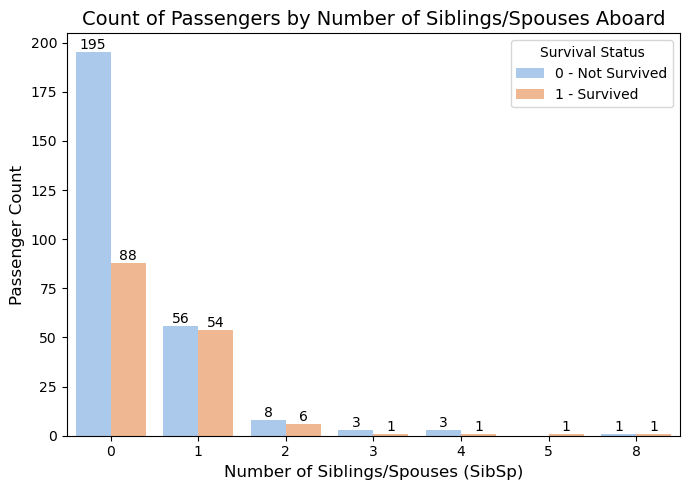

In [29]:
plt.figure(figsize=(7, 5))
ax = sns.countplot(data=df, x='SibSp',hue='Survived',palette='pastel')

for bar in ax.containers:
    ax.bar_label(bar, fontsize=10)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['0 - Not Survived', '1 - Survived'], title='Survival Status')

plt.title('Count of Passengers by Number of Siblings/Spouses Aboard', fontsize=14)
plt.xlabel('Number of Siblings/Spouses (SibSp)', fontsize=12)
plt.ylabel('Passenger Count', fontsize=12)
plt.tight_layout()
plt.show()

- Most passengers (siblings/spouses) traveled alone (`SibSp = 0`).
- Very few had large family groups onboard.
- Family size might influence survival rates and risk.

In [30]:
df['Is_Deck_Known'] = np.where(df['Cabin'].isna(), 0, 1)

In [31]:
print(df.groupby('Is_Deck_Known')['Survived'].mean())

Is_Deck_Known
0    0.330275
1    0.483516
Name: Survived, dtype: float64


# Feature Engineering 

In [32]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Create IsAlone Feature
df['IsAlone'] = np.where(df['FamilySize'] == 1, 1, 0)

# Extracting Title from Name
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don',
                                   'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

In [33]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Is_Deck_Known,FamilySize,IsAlone,Title
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,1,Mr
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,2,0,Mrs
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,1,Mr
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,1,1,Mr
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,3,0,Mrs


## Survival Count by Family Size

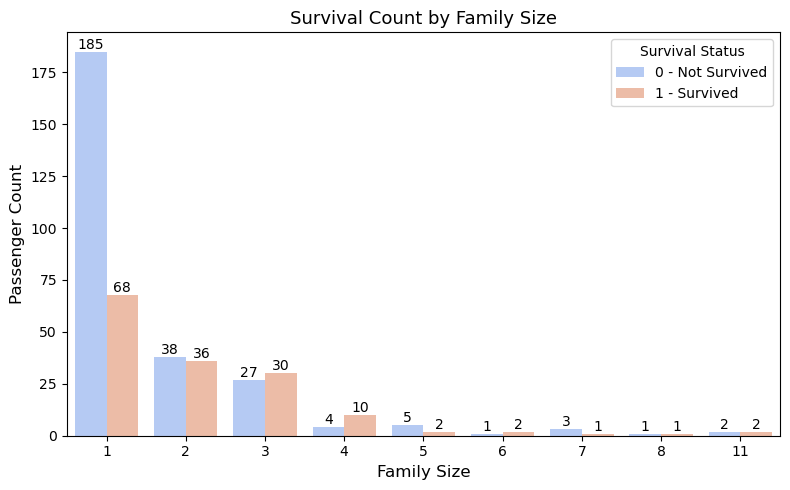

In [34]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='FamilySize', hue='Survived', data=df, palette='coolwarm')

for bar in ax.containers:
    ax.bar_label(bar, fontsize=10) 

plt.title('Survival Count by Family Size', fontsize=13)
plt.xlabel('Family Size', fontsize=12)
plt.ylabel('Passenger Count', fontsize=12)

# Custom legend to replace 0 and 1 with descriptive labels
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['0 - Not Survived', '1 - Survived'], title='Survival Status')

plt.tight_layout()
plt.show()

- Single Travelers Dominate: Most passengers traveled alone (Family Size 1), with high non-survival.
- Survival Decreases with Size: Survival generally declined as family size increased.
- Small Families Fared Better: Families with 2-3 members had relatively higher survival.
- Large Families Had Low Survival: Families with 6+ members had very low survival rates.
- Alone Wasn't Decisive: Being alone didn't guarantee survival or death.

## Data Cleaning and Preprocessing (using Pipelines & Transformers)

In [35]:
features_to_drop = ['PassengerId', 'Name', 'Ticket','Cabin']  # Dropping non-useful features
df.drop(features_to_drop, axis=1, inplace=True)

target = 'Survived'
X = df.drop(target, axis=1)
y = df[target]

numeric_features = ['Age', 'Fare', 'FamilySize','Is_Deck_Known']
categorical_features = ['Sex', 'Embarked', 'Title', 'Pclass', 'IsAlone']

In [36]:
X.isna().sum()

Pclass            0
Sex               0
Age              86
SibSp             0
Parch             0
Fare              1
Embarked          0
Is_Deck_Known     0
FamilySize        0
IsAlone           0
Title             0
dtype: int64

### Importing essential libraries for data preprocessing, transformation, and modeling

In [37]:
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

## Preprocessing & Logistic Regression Pipeline

In [38]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical Transformer
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine Transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Full Pipeline with Logistic Regression
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=200))
])

## Splitting the dataset into trainnig and testing

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
pipeline.fit(X_train, y_train) # Model Fitting

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare', 'FamilySize',
                                                   'Is_Deck_Known']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'Embarked', 'Title',
                                                   'Pclass', 'IsAlone'])])),
                ('classifier', LogisticRegression(max_iter=200))])

In [41]:
# Predicting the target values (Survival) on the test dataset using the trained pipeline
y_pred = pipeline.predict(X_test)
# Calculating and printing the accuracy of the model on the test dataset
print("Accuracy:", accuracy_score(y_test, y_pred))
# Generating a detailed classification report including precision, recall, f1-score, and support
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [42]:
# Performing 5-Fold Cross-Validation to evaluate model performance on different data splits
cv_scores = cross_val_score(pipeline, X, y, cv=5)
print(f"\nCross-Validation Accuracy: {np.mean(cv_scores):.4f}")


Cross-Validation Accuracy: 1.0000


In [43]:
# This function takes a trained pipeline model and a single passenger's data (as a dictionary),converts it into a DataFrame, 
# predicts survival,and prints whether the passenger "Survived" or "Did Not Survive".

def predict_passenger(pipeline_model, passenger_data):
    """
    Predict survival for a single passenger dict.
    Example input:
    passenger_data = {
        'Pclass': 3, 'Sex': 'male', 'Age': 22, 'SibSp': 1, 'Parch': 0, 'Fare': 7.25,
        'Embarked': 'S', 'FamilySize': 2, 'IsAlone': 0, 'Title': 'Mr', 'Is_Deck_Known': 0
    }
    """
    passenger_df = pd.DataFrame([passenger_data])
    prediction = pipeline_model.predict(passenger_df)
    result = "Survived" if prediction[0] == 1 else "Did Not Survive"
    print(f"Prediction: {result}")

In [44]:
# This is sample test to check prediction
sample_passenger = {
    'Pclass': 3,
    'Sex': 'female',
    'Age': 22,
    'Fare': 7.25,
    'Embarked': 'S',
    'FamilySize': 2,
    'IsAlone': 0,
    'Title': 'Mr',
    'Is_Deck_Known': 0
}
predict_passenger(pipeline, sample_passenger) # calling the function

Prediction: Survived
